<a href="https://colab.research.google.com/github/ZJawadi/controlledQuantumTeleportation/blob/main/Controlled_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit qiskit-ibm-runtime
%pip install pylatexenc
%pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9aac91363f76c0a3b37ef519fc7bb8433a36ead45eb54d9784c13e8d45b6f41a
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
import pylatexenc

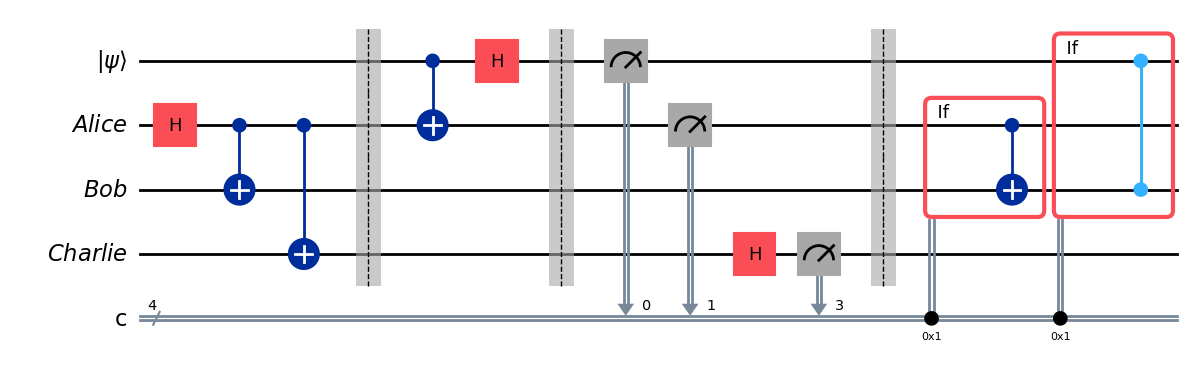

In [4]:
q0 = QuantumRegister(1, '|ψ⟩')
q1 = QuantumRegister(1, 'Alice')
q2 = QuantumRegister(1, 'Bob')
q3 = QuantumRegister(1, 'Charlie')
c = ClassicalRegister(4, 'c')

c = ClassicalRegister(4, 'c')
protocol = QuantumCircuit(q0, q1, q2, q3, c)

protocol.h(1)
protocol.cx(1, 2)
protocol.cx(1, 3)
protocol.barrier()

protocol.cx(0, 1)
protocol.h(0)
protocol.barrier()
protocol.measure(0, 0)
protocol.measure(1, 1)
protocol.h(3)
protocol.measure(3, 3)
protocol.barrier()

with protocol.if_test((c, 1)):
    protocol.cx(1, 2)
with protocol.if_test((c, 1)):
    protocol.cz(0, 2)

display(protocol.draw(output="mpl"))